<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699">Introduction to the SpatioTemporal Asset Catalog (STAC) in Julia</span>
<hr style="border:2px solid #0077b9;">

<div style="text-align: left;">
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/Python/stac/stac-introduction.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<br/>

<div style="text-align: center;font-size: 90%;">
    Matheus Zaglia<sup><a href="https://orcid.org/0000-0001-6181-2158"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Rennan Marujo<sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto R. Queiroz<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Felipe Menino Carlos<sup><a href="https://orcid.org/0000-0002-3334-4315"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: May 21, 2024
</div>
<br/>

<div style="text-align: center;font-size: 90%;"> Adapted for Julia by Julia A. Cansado. Sep 20, 2025 </div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use the STAC service to discover and access the data products from the <em>Brazil Data Cube</em>.
</div>

<br/>
<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;font-size: 75%; border-style: solid; border-color: #0077b9; border-width: 1px; padding: 5px;">
    <b>This Jupyter Notebook is a supplement to the following paper:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    Zaglia, M.; Vinhas, L.; Queiroz, G. R.; Simões, R. <a href="http://urlib.net/rep/8JMKD3MGPDW34R/3UFEFD8" target="_blank">Catalogação de Metadados do Cubo de Dados do Brasil com o SpatioTemporal Asset Catalog</a>. In: Proceedings XX GEOINFO, November 11-13, 2019, São José dos Campos, SP, Brazil. p 280-285.
    </div>
</div>

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac.png?raw=true" align="right" width="66"/>

# Introduction
<hr style="border:1px solid #0077b9;">

The [**S**patio**T**emporal **A**sset **C**atalog (STAC)](https://stacspec.org/) is a specification created through the colaboration of several organizations intended to increase satellite image search interoperability.

The diagram depicted in the picture contains the most important concepts behind the STAC data model:

<center>
<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-concept.png" width="480" />
<br/>
<b>Figure 1</b> - STAC model.
</center>

The description of the concepts below are adapted from the [STAC Specification](https://github.com/radiantearth/stac-spec):

- **Item**: a `STAC Item` is the atomic unit of metadata in STAC, providing links to the actual `assets` (including thumbnails) that they represent. It is a `GeoJSON Feature` with additional fields for things like time, links to related entities and mainly to the assets. According to the specification, this is the atomic unit that describes the data to be discovered in a `STAC Catalog` or `Collection`.

- **Asset**: a `spatiotemporal asset` is any file that represents information about the earth captured in a certain space and time.


- **Catalog**: provides a structure to link various `STAC Items` together or even to other `STAC Catalogs` or `Collections`.


- **Collection:** is a specialization of the `Catalog` that allows additional information about a spatio-temporal collection of data.

# STAC Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [STAC.jl](https://juliaclimate.github.io/STAC.jl/dev/). To install it use Pkg, as the following command:

In [1]:
using Pkg
Pkg.update()
Pkg.add("STAC")
Pkg.add("GDAL")
Pkg.add("ArchGDAL")
Pkg.add("Rasters")
Pkg.add("Proj")
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Installed GR_jll ─────────────── v0.73.19+1
   Installed JpegTurbo_jll ──────── v3.1.4+0
   Installed Malt ───────────────── v1.3.1
   Installed CodeTracking ───────── v3.0.0
   Installed Preferences ────────── v1.5.1
   Installed OpenSSL ────────────── v1.6.1
   Installed NearestNeighbors ───── v0.4.26
   Installed Pango_jll ──────────── v1.57.0+0
   Installed JSON ───────────────── v1.3.0
   Installed xkbcommon_jll ──────── v1.13.0+0
   Installed GLFW_jll ───────────── v3.4.1+0
   Installed QOI ────────────────── v1.0.2
   Installed LoweredCodeUtils ───── v3.5.0
   Installed Revise ─────────────── v3.12.3
   Installed MappedArrays ───────── v0.4.3
   Installed libpng_jll ─────────── v1.6.53+0
   Installed ImageMagick_jll ────── v7.1.2011+0
   Installed StatsAPI ───────────── v1.8.0
   Installed JuliaInterpreter ───── v0.10.9
   Installed StatsBase ──────────── v0.34.9
   Installed Plots ──────────────── v1.41.3
   Install

Note: to take advantage of the Julia language, we're going to add other here packages as well, which will be used throughout the notebook.

This step is called pre-compiling, and it may take a while, but it will make the rest of our coding much faster.

In order to access the funcionalities of the client API, you should import the `stac` package, as follows:

In [2]:
Pkg.add("Downloads")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [3]:
using STAC

After that, you can check the installed `stac` package version:


In [4]:
Pkg.status("STAC")

Status `~/.julia/environments/v1.11/Project.toml`
  [08e62803] STAC v0.1.3


Then, create a `STAC` object attached to the Brazil Data Cube' STAC service:


In [5]:
service = STAC.Catalog("https://data.inpe.br/bdc/stac/v1/")

INPE
INPE STAC Server
This is the landing page for the INPE STAC server. The SpatioTemporal Asset Catalogs (STAC) provide a standardized way to expose collections of spatial temporal data. Here you will find collections of data provided by projects and areas of INPE.
Children:
   * CB4-WFI-L4-SR-1: CBERS-4/WFI - Level-4-SR - Cloud Optimized GeoTIFF
   * CB4-PAN10M-L2-DN-1: CBERS-4/PAN10M - Level-2-DN
   * sentinel-3-olci-l1-bundle-1: Sentinel-3/OLCI - Level-1B Full Resolution
   * mosaic-cbers4a-paraiba-3m-1: CBERS-4A/WFI 3M Paraíba State Mosaic
   * LCC_L8_30_16D_STK_Cerrado-1: LCC - Cerrado - LC8 30m 16D STK
   * mosaic-landsat-sp-6m-1: Landsat 6M São Paulo State Mosaic
   * mosaic-s2-paraiba-3m-1: S2 3M Paraiba State Mosaic
   * landsat-2: Landsat Collection 2 - Level-2
   * LCC_L8_30_16D_STK_MataAtlantica-1: LCC - Mata Atlantica - LC8 30m 16D STK
   * mosaic-s2-yanomami_territory-6m-1: S2 6M Yanomami Indigenous Territory Mosaic
   * CB4A-MUX-L2-DN-1: CBERS-4A/MUX - Level-2-DN
   * 

# Listing the Available Data Products
<hr style="border:1px solid #0077b9;">

In the Jupyter environment, the `STAC` object will list the available image and data cube collections from the service:


In [6]:
for collection in eachcatalog(service) 
    @show id(collection)
end

id(collection) = "CB4-WFI-L4-SR-1"
id(collection) = "CB4-PAN10M-L2-DN-1"
id(collection) = "sentinel-3-olci-l1-bundle-1"
id(collection) = "mosaic-cbers4a-paraiba-3m-1"
id(collection) = "LCC_L8_30_16D_STK_Cerrado-1"
id(collection) = "mosaic-landsat-sp-6m-1"
id(collection) = "mosaic-s2-paraiba-3m-1"
id(collection) = "landsat-2"
id(collection) = "LCC_L8_30_16D_STK_MataAtlantica-1"
id(collection) = "mosaic-s2-yanomami_territory-6m-1"
id(collection) = "CB4A-MUX-L2-DN-1"
id(collection) = "LCC_L8_30_16D_STK_Pantanal-1"
id(collection) = "LCC_L8_30_1M_STK_Cerrado-1"
id(collection) = "CB4A-WPM-L4-DN-1"
id(collection) = "MODISA-OCSMART-RRS-MONTHLY-1"
id(collection) = "mosaic-s2-brazil-3m-1"
id(collection) = "CB4A-WPM-L2-DN-1"
id(collection) = "AMZ1-WFI-L2-DN-1"
id(collection) = "S2_L2A_BUNDLE-1"
id(collection) = "myd13q1-6.1"
id(collection) = "mosaic-landsat-amazon-3m-1"
id(collection) = "AMZ1-WFI-L4-SR-1"
id(collection) = "mosaic-s2-amazon-3m-1"
id(collection) = "CBERS4-WFI-16D-2"
id(collection) 

<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-catalog.png?raw=true" align="right" width="300"/>

# Retrieving the Metadata of a Collection
<hr style="border:1px solid #0077b9;">

The `bracket notation` (`[]`) returns information about a given image or data cube collection identified by its name. In this example we are retrieving information about the datacube collection `S2-16D-2`:

In [7]:
collection_id = "S2-16D-2"
collection = service[collection_id]

println("Type: ", STAC.type(collection))
println("ID: ", STAC.id(collection))


Type: Collection
ID: S2-16D-2


<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-item.png?raw=true" align="right" width="300"/>

# Retrieving Items
<hr style="border:1px solid #0077b9;">

The `eachitem` method returns the items of a given collection:

In [8]:
for c in eachitem(collection)
    @show id(c)
end

id(c) = "S2-16D_V2_003011_20251117"
id(c) = "S2-16D_V2_002015_20251117"
id(c) = "S2-16D_V2_002013_20251117"
id(c) = "S2-16D_V2_002016_20251117"
id(c) = "S2-16D_V2_002011_20251117"
id(c) = "S2-16D_V2_002014_20251117"
id(c) = "S2-16D_V2_002012_20251117"
id(c) = "S2-16D_V2_003013_20251117"
id(c) = "S2-16D_V2_003012_20251117"
id(c) = "S2-16D_V2_001014_20251117"
id(c) = "S2-16D_V2_003015_20251117"
id(c) = "S2-16D_V2_004013_20251117"
id(c) = "S2-16D_V2_003014_20251117"
id(c) = "S2-16D_V2_003016_20251117"
id(c) = "S2-16D_V2_004012_20251117"
id(c) = "S2-16D_V2_004014_20251117"
id(c) = "S2-16D_V2_004015_20251117"
id(c) = "S2-16D_V2_004011_20251117"
id(c) = "S2-16D_V2_004010_20251117"
id(c) = "S2-16D_V2_004016_20251117"
id(c) = "S2-16D_V2_005005_20251117"
id(c) = "S2-16D_V2_005004_20251117"
id(c) = "S2-16D_V2_005009_20251117"
id(c) = "S2-16D_V2_005007_20251117"
id(c) = "S2-16D_V2_005006_20251117"
id(c) = "S2-16D_V2_005012_20251117"
id(c) = "S2-16D_V2_005010_20251117"
id(c) = "S2-16D_V2_005011_20

In order to support filtering rules through the specification of a rectangle (`bbox`) or a date and time (`datatime`) criterias, use the `Client.search(**kwargs)`:


The method `.search(**kwargs)` returns a `ItemSearch` representation which has handy methods to identify the matched results. For example, to check the number of items matched, use `.matched()`:

In [9]:
using Dates, STAC

time_range = (DateTime(2018,08,01), DateTime(2019,07,31))
lon_range = (-61.7960,-61.7033)
lat_range = (-9.0374,-8.9390)

search_results = collect(search(service, collection_id, lon_range, lat_range, time_range))
println(search_results[1])


S2-16D_V2_014015_20190728
bounding box:
    ┌────── -8.58859───────┐
    │                      │
-62.29310              -61.29249
    │                      │
    └────── -9.55619───────┘

date time: 2019-07-28T00:00:00
Assets:
   * B01
   * B02
   * B03
   * B04
   * B05
   * B06
   * B07
   * B08
   * B09
   * B11
   * B12
   * B8A
   * EVI
   * NBR
   * SCL
   * NDVI
   * CLEAROB
   * TOTALOB
   * thumbnail
   * PROVENANCE



In [10]:
println("Number of items found: ", length(search_results))

Number of items found: 24


To iterate over the matched result, use `.items()` to traverse the list of items:

In [11]:
for item in search_results
    @show id(item)
end

id(item) = "S2-16D_V2_014015_20190728"
id(item) = "S2-16D_V2_014015_20190712"
id(item) = "S2-16D_V2_014015_20190626"
id(item) = "S2-16D_V2_014015_20190610"
id(item) = "S2-16D_V2_014015_20190525"
id(item) = "S2-16D_V2_014015_20190509"
id(item) = "S2-16D_V2_014015_20190423"
id(item) = "S2-16D_V2_014015_20190407"
id(item) = "S2-16D_V2_014015_20190322"
id(item) = "S2-16D_V2_014015_20190306"
id(item) = "S2-16D_V2_014015_20190218"
id(item) = "S2-16D_V2_014015_20190202"
id(item) = "S2-16D_V2_014015_20190117"
id(item) = "S2-16D_V2_014015_20190101"
id(item) = "S2-16D_V2_014015_20181219"
id(item) = "S2-16D_V2_014015_20181203"
id(item) = "S2-16D_V2_014015_20181117"
id(item) = "S2-16D_V2_014015_20181101"
id(item) = "S2-16D_V2_014015_20181016"
id(item) = "S2-16D_V2_014015_20180930"
id(item) = "S2-16D_V2_014015_20180914"
id(item) = "S2-16D_V2_014015_20180829"
id(item) = "S2-16D_V2_014015_20180813"
id(item) = "S2-16D_V2_014015_20180728"


<img src="https://raw.githubusercontent.com/brazil-data-cube/code-gallery/master/img/stac/stac-asset.png?raw=true" align="right" width="300"/>

# Assets
<hr style="border:1px solid #0077b9;">

The assets with the links to the images, thumbnails or specific metadata files, can be accessed through the property `assets` (from a given item):

In [12]:
# println(search_results[1])
target_id = "S2-16D_V2_014015_20181016"
found_item = filter(item -> STAC.id(item) == target_id, search_results)
# println((search_results["S2-16D_V2_014015_20190728"]))


1-element Vector{STAC.Item}:
 S2-16D_V2_014015_20181016
bounding box:
    ┌────── -8.58859───────┐
    │                      │
-62.29310              -61.29249
    │                      │
    └────── -9.55619───────┘

date time: 2018-10-16T00:00:00
Assets:
   * B01
   * B02
   * B03
   * B04
   * B05
   * B06
   * B07
   * B08
   * B09
   * B11
   * B12
   * B8A
   * EVI
   * NBR
   * SCL
   * NDVI
   * CLEAROB
   * TOTALOB
   * thumbnail
   * PROVENANCE


In [13]:
assets = keys(search_results[1])

KeySet for a OrderedCollections.OrderedDict{String, STAC.Asset} with 20 entries. Keys:
  "B01"
  "B02"
  "B03"
  "B04"
  "B05"
  "B06"
  "B07"
  "B08"
  "B09"
  "B11"
  "B12"
  "B8A"
  "EVI"
  "NBR"
  "SCL"
  "NDVI"
  "CLEAROB"
  "TOTALOB"
  "thumbnail"
  "PROVENANCE"

In [14]:
test = search_results[1]
assets = test.assets

OrderedCollections.OrderedDict{String, STAC.Asset} with 20 entries:
  "B01"        => type: image/tiff; application=geotiff; profile=cloud-optimize…
  "B02"        => type: image/tiff; application=geotiff; profile=cloud-optimize…
  "B03"        => type: image/tiff; application=geotiff; profile=cloud-optimize…
  "B04"        => type: image/tiff; application=geotiff; profile=cloud-optimize…
  "B05"        => type: image/tiff; application=geotiff; profile=cloud-optimize…
  "B06"        => type: image/tiff; application=geotiff; profile=cloud-optimize…
  "B07"        => type: image/tiff; application=geotiff; profile=cloud-optimize…
  "B08"        => type: image/tiff; application=geotiff; profile=cloud-optimize…
  "B09"        => type: image/tiff; application=geotiff; profile=cloud-optimize…
  "B11"        => type: image/tiff; application=geotiff; profile=cloud-optimize…
  "B12"        => type: image/tiff; application=geotiff; profile=cloud-optimize…
  "B8A"        => type: image/tiff; appli

The metadata related to the Sentinel-2/MSI blue band is available under the dictionary key `B02`:


In [15]:
blue_asset = assets["B01"]
println(blue_asset)
#get profile with rasteio + blocksize

type: image/tiff; application=geotiff; profile=cloud-optimized
href: https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/07/28/S2-16D_V2_014015_20190728_B01.tif



In [16]:
STAC.href(blue_asset)

"https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/07/28/S2-16D_V2_014015_20190728_B01.tif"

In [17]:
for asset in assets
    @show asset
end

asset = "B01" => type: image/tiff; application=geotiff; profile=cloud-optimized
href: https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/07/28/S2-16D_V2_014015_20190728_B01.tif

asset = "B02" => type: image/tiff; application=geotiff; profile=cloud-optimized
href: https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/07/28/S2-16D_V2_014015_20190728_B02.tif

asset = "B03" => type: image/tiff; application=geotiff; profile=cloud-optimized
href: https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/07/28/S2-16D_V2_014015_20190728_B03.tif

asset = "B04" => type: image/tiff; application=geotiff; profile=cloud-optimized
href: https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/07/28/S2-16D_V2_014015_20190728_B04.tif

asset = "B05" => type: image/tiff; application=geotiff; profile=cloud-optimized
href: https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/07/28/S2-16D_V2_014015_20190728_B05.tif

asset = "B06" => type: image/tiff; application=geotiff; profile=cloud-optimized
href: https://data.i

# Using Rasters.jl
<hr style="border:1px solid #0077b9;">

The `Rasters.jl` library can be used to read image files from the Brazil Data Cube' service on-the-fly and then to create arrays. The `Raster` method of an `Item` can be used to perform the reading and array creation:


In [18]:
using Rasters
import ArchGDAL

In [19]:
nir = Raster(STAC.href(assets["B08"]), lazy=true)

┌ 10560×10560 Raster{Union{Missing, Int16}, 2} ┐
├──────────────────────────────────────────────┴───────────────────────── dims ┐
  ↓ X Projected{Float64} 4.1024e6:10.0:4.20799e6 ForwardOrdered Regular Intervals{Start},
  → Y Projected{Float64} 1.036959e7:-10.0:1.0264e7 ReverseOrdered Regular Intervals{Start}
├──────────────────────────────────────────────────────────────────── metadata ┤
  Metadata{Rasters.GDALsource} of Dict{String, Any} with 1 entry:
  "filepath" => "/vsicurl/https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/…
├────────────────────────────────────────────────────────────────────── raster ┤
  missingval: missing
  extent: Extent(X = (4.1024e6, 4.208e6), Y = (1.0264e7, 1.03696e7))
  crs: PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_GRS80_elli...
  filename: https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/07/28/S2-16D_V2_014015_20190728_B08.tif
└──────────────────────────────────────────────────────────────────────────────┘


In [20]:
nir_slice = nir[1:5, :]
display(nir_slice)

┌ 5×10560 Raster{Union{Missing, Int16}, 2} ┐
├──────────────────────────────────────────┴───────────────────────────── dims ┐
  ↓ X Projected{Float64} 4.1024e6:10.0:4.10244e6 ForwardOrdered Regular Intervals{Start},
  → Y Projected{Float64} 1.036959e7:-10.0:1.0264e7 ReverseOrdered Regular Intervals{Start}
├──────────────────────────────────────────────────────────────────── metadata ┤
  Metadata{Rasters.GDALsource} of Dict{String, Any} with 1 entry:
  "filepath" => "/vsicurl/https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/…
├────────────────────────────────────────────────────────────────────── raster ┤
  missingval: missing
  extent: Extent(X = (4.1024e6, 4.10245e6), Y = (1.0264e7, 1.03696e7))
  crs: PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_GRS80_elli...
└──────────────────────────────────────────────────────────────────────────────┘
 ↓ →           1.03696e7     1.03696e7  …     1.0264e7     1.0264e7
 4.1024e6   2646          2860             2669         2578
 4

In [21]:
red = Raster(STAC.href(assets["B04"]), lazy=true)[X(1:500), Y(1:500)]

┌ 500×500 Raster{Union{Missing, Int16}, 2} ┐
├──────────────────────────────────────────┴───────────────────────────── dims ┐
  ↓ X Projected{Float64} 4.1024e6:10.0:4.10739e6 ForwardOrdered Regular Intervals{Start},
  → Y Projected{Float64} 1.036959e7:-10.0:1.03646e7 ReverseOrdered Regular Intervals{Start}
├──────────────────────────────────────────────────────────────────── metadata ┤
  Metadata{Rasters.GDALsource} of Dict{String, Any} with 1 entry:
  "filepath" => "/vsicurl/https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/…
├────────────────────────────────────────────────────────────────────── raster ┤
  missingval: missing
  extent: Extent(X = (4.1024e6, 4.1074e6), Y = (1.03646e7, 1.03696e7))
  crs: PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_GRS80_elli...
└──────────────────────────────────────────────────────────────────────────────┘
 ↓ →          1.03696e7    1.03696e7  …    1.03646e7    1.03646e7
 4.1024e6   209          209             204          203
 4.102

In [22]:
green = Raster(STAC.href(assets["B03"]), lazy=true)[X(1:500), Y(1:500)]

┌ 500×500 Raster{Union{Missing, Int16}, 2} ┐
├──────────────────────────────────────────┴───────────────────────────── dims ┐
  ↓ X Projected{Float64} 4.1024e6:10.0:4.10739e6 ForwardOrdered Regular Intervals{Start},
  → Y Projected{Float64} 1.036959e7:-10.0:1.03646e7 ReverseOrdered Regular Intervals{Start}
├──────────────────────────────────────────────────────────────────── metadata ┤
  Metadata{Rasters.GDALsource} of Dict{String, Any} with 1 entry:
  "filepath" => "/vsicurl/https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/…
├────────────────────────────────────────────────────────────────────── raster ┤
  missingval: missing
  extent: Extent(X = (4.1024e6, 4.1074e6), Y = (1.03646e7, 1.03696e7))
  crs: PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_GRS80_elli...
└──────────────────────────────────────────────────────────────────────────────┘
 ↓ →          1.03696e7    1.03696e7  …    1.03646e7    1.03646e7
 4.1024e6   376          384             387          356
 4.102

In [23]:
blue = Raster(STAC.href(assets["B02"]), lazy=true)[X(1:500), Y(1:500)]

┌ 500×500 Raster{Union{Missing, Int16}, 2} ┐
├──────────────────────────────────────────┴───────────────────────────── dims ┐
  ↓ X Projected{Float64} 4.1024e6:10.0:4.10739e6 ForwardOrdered Regular Intervals{Start},
  → Y Projected{Float64} 1.036959e7:-10.0:1.03646e7 ReverseOrdered Regular Intervals{Start}
├──────────────────────────────────────────────────────────────────── metadata ┤
  Metadata{Rasters.GDALsource} of Dict{String, Any} with 1 entry:
  "filepath" => "/vsicurl/https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/…
├────────────────────────────────────────────────────────────────────── raster ┤
  missingval: missing
  extent: Extent(X = (4.1024e6, 4.1074e6), Y = (1.03646e7, 1.03696e7))
  crs: PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_GRS80_elli...
└──────────────────────────────────────────────────────────────────────────────┘
 ↓ →          1.03696e7    1.03696e7  …    1.03646e7    1.03646e7
 4.1024e6   231          222             244          241
 4.102

You can also load using Coordinates:

In [24]:
using Rasters, ArchGDAL

rst = Raster(STAC.href(assets["B02"]); lazy=true)[X(4150000.0..4160000.0), Y(10300000.0..10310000.0)]
println(size(rst))
rst

(1000, 1000)


┌ 1000×1000 Raster{Union{Missing, Int16}, 2} ┐
├────────────────────────────────────────────┴─────────────────────────── dims ┐
  ↓ X Projected{Float64} 4.15e6:10.0:4.15999e6 ForwardOrdered Regular Intervals{Start},
  → Y Projected{Float64} 1.030999e7:-10.0:1.03e7 ReverseOrdered Regular Intervals{Start}
├──────────────────────────────────────────────────────────────────── metadata ┤
  Metadata{Rasters.GDALsource} of Dict{String, Any} with 1 entry:
  "filepath" => "/vsicurl/https://data.inpe.br/bdc/data/s2-16d/v2/014/015/2019/…
├────────────────────────────────────────────────────────────────────── raster ┤
  missingval: missing
  extent: Extent(X = (4.15e6, 4.16e6), Y = (1.03e7, 1.031e7))
  crs: PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_GRS80_elli...
└──────────────────────────────────────────────────────────────────────────────┘
 ↓ →          1.031e7    1.031e7    1.031e7  …    1.03e7    1.03e7    1.03e7
 4.15e6     448        381        360           687       665    

If you wish you can use lat long coordinates and reproject them into the Albers Equal Area Projection, which is used in the BDC products:

In [25]:
raster_wkt = crs(rst).val
println(raster_wkt)

PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_GRS80_ellipsoid",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",-12],PARAMETER["longitude_of_center",-54],PARAMETER["standard_parallel_1",-2],PARAMETER["standard_parallel_2",-22],PARAMETER["false_easting",5000000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [26]:
using Rasters, Proj

in_proj = Proj.CRS("EPSG:4326")  # WGS84
out_proj = Proj.CRS(raster_wkt)
# out_proj
transformer = Proj.Transformation(in_proj, out_proj, always_xy=true)
x1, y1 = -61.7960, -9.0374
x2, y2 = -61.7033, -8.9390
x1_reproj, y1_reproj = transformer((x1, y1))
x2_reproj, y2_reproj = transformer((x2, y2))
println("$x1, $y1, $x2, $y2")
println("$x1_reproj, $y1_reproj, $x2_reproj, $y2_reproj")

rst = Raster(STAC.href(assets["B02"]); lazy=true)[X(x1_reproj..x2_reproj), Y(y1_reproj..y2_reproj)]
println(size(rst))

-61.796, -9.0374, -61.7033, -8.939
4.1546502708582133e6, 1.0320765662874771e7, 4.164395760825622e6, 1.033207300638397e7
(973, 1130)


If you ran the python version of this notebook, there are some small but important differences in the above result:

The resulting shape of python's result is `shape = (1131, 975)`. Here, we have got `size = (973, 1130)` . Python prints arrays as `(rows, columns)`, while Julia has `(columns, rows)` as default.

Also, the difference in pixels could be from the differences beetween the functions used. Rasterio's `from_bounds` function includes any pixels that touch the bounding box, while what we do in the following line:
<br/>

`rst = Raster(STAC.href(assets["B02"]); lazy=true)[X(x1_reproj..x2_reproj), Y(y1_reproj..y2_reproj)]`
<br/> 
with the `..` operator is gets pixels which centers within these coordinates.




# Using Plots to Visualize Images
<hr style="border:1px solid #0077b9;">

The `Plots` can be used to plot the arrays read in the last section:

In [27]:
using Plots, Plots.Measures

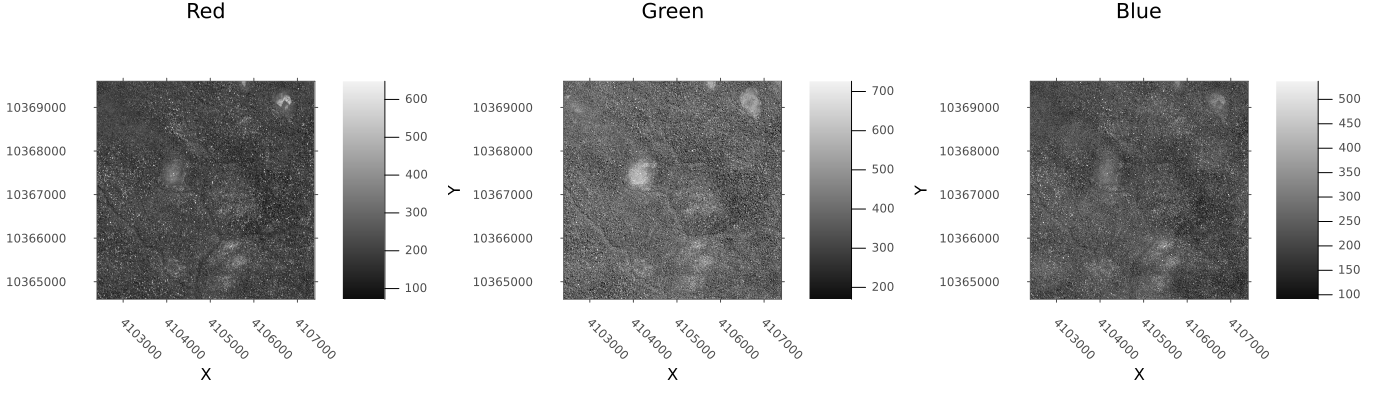

In [28]:
p1 = plot(red, c=:grays,  title="Red")
p2 = plot(green, c=:grays, title="Green")
p3 = plot(blue, c=:grays,title="Blue")

plot(p1, p2, p3, layout = (1, 3), size = (1400, 400))

# Retrieving Image Files
<hr style="border:1px solid #0077b9;">

The file related to an asset can be retrieved through the `download` method. The cell code below shows ho to download the image file associated to the asset into a folder named `img`:

In [29]:
using Downloads

output_path = "./img"

isdir("img") || mkdir("img")

Downloads.download(STAC.href(assets["B05"]),joinpath(output_path, "B05.tif"))

"./img/B05.tif"

In order to download all files related to an item, iterate over assets and download each one as following:

In [30]:
for asset in assets
    asset_name = asset[1]
    Downloads.download(STAC.href(asset[2]),joinpath(output_path, "$asset_name.tif"))
    @show asset_name
end

asset_name = "B01"
asset_name = "B02"
asset_name = "B03"
asset_name = "B04"
asset_name = "B05"
asset_name = "B06"
asset_name = "B07"
asset_name = "B08"
asset_name = "B09"
asset_name = "B11"
asset_name = "B12"
asset_name = "B8A"
asset_name = "EVI"
asset_name = "NBR"
asset_name = "SCL"
asset_name = "NDVI"
asset_name = "CLEAROB"
asset_name = "TOTALOB"
asset_name = "thumbnail"
asset_name = "PROVENANCE"


# References
<hr style="border:1px solid #0077b9;">

- [Spatio Temporal Asset Catalog Specification](https://stacspec.org/)

- [Python Client Library for STAC Service](https://pystac-client.readthedocs.io/en/latest/)

- [Introduction to the SpatioTemporal Asset Catalog (STAC)](https://github.com/brazil-data-cube/code-gallery/blob/master/jupyter/Python/stac/stac-introduction.ipynb) ⟶ original Python notebook.